In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [5]:
df = pd.read_excel('Shopify_data.xlsx')

In [14]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [17]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


The Following plots outlines the presence of outliers and the level of skewness of the data.

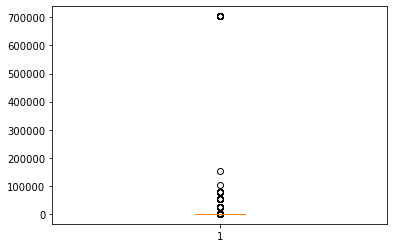

<Figure size 720x504 with 0 Axes>

In [21]:
plt.boxplot(df['order_amount'])
fig = plt.figure(figsize=(10, 7))
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


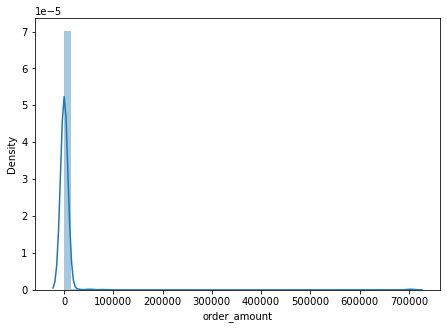

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['order_amount'])
plt.show()

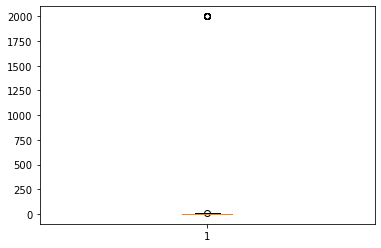

<Figure size 720x504 with 0 Axes>

In [28]:
plt.boxplot(df['total_items'])
fig = plt.figure(figsize=(10, 7))
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


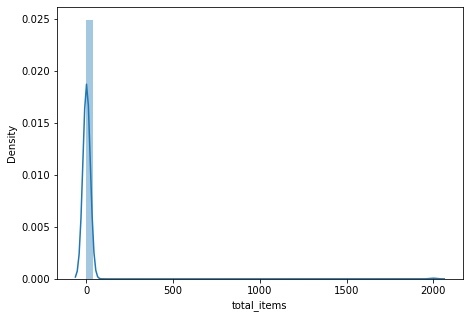

In [27]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['total_items'])
plt.show()

As we could see in the above plots there are some outliers and there is skewness present in the data. Now we check the amount of skewness and apply two data transformation: - Log Transformation and BoxCox to handle the skewness.

In [24]:
# To Check the level of skewness in the data
df.skew()

order_id         0.000000
shop_id          0.013830
user_id         -0.034052
order_amount    16.675033
total_items     17.065556
dtype: float64

In [26]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [11]:
order_amount_log = np.log(df['order_amount'])
order_amount_log.skew()

4.603344921462538

In [12]:
total_items_log = np.log(df['total_items'])
total_items_log.skew()

4.545786092312774

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


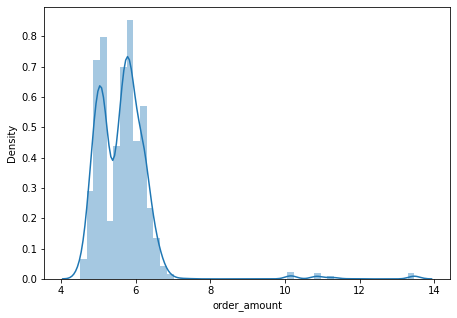

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(order_amount_log)
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


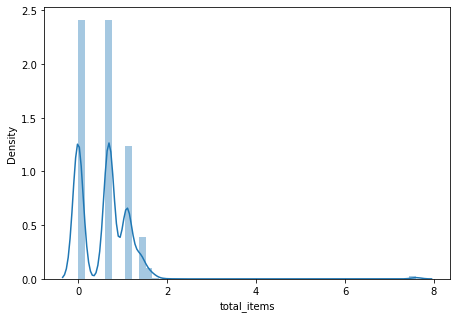

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(total_items_log)
plt.show()

In [8]:
order_amount_bc = stats.boxcox(df['order_amount'])[0]
pd.Series(order_amount_bc).skew()

-0.013781765336292034

In [14]:
total_items_bc = stats.boxcox(df['total_items'])[0]
pd.Series(total_items_bc).skew()

0.024281859186685174

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


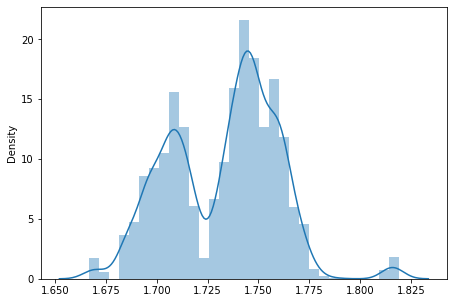

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(order_amount_bc)
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


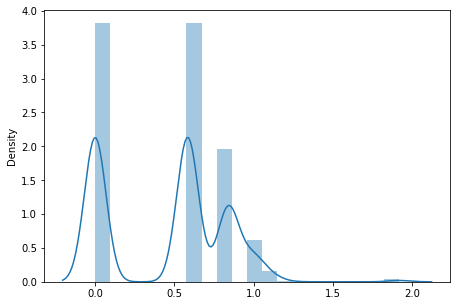

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(total_items_bc)
plt.show()

Log Transformation and BoxCox Technique were both very effective in handling the outlier which was not taken in consideration in the question's Average Order Value(AOV) Technique. Hence the metric question got is flawed.

In [38]:
df_user = pd.DataFrame({'mean_amount': df.groupby('user_id')['order_amount'].mean()}).reset_index()
df_user

,user_id,mean_amount
0,607,704000.000000
1,700,299.375000
2,701,397.076923
3,702,406.615385
4,703,380.687500
...,...,...
296,995,354.400000
297,996,252.952381
298,997,2248.923077
299,998,291.111111


In [35]:
len(df[df['user_id']==607])

17

User ID 607 purchased 17 times from the same shop(ShopID = 42) with the same order amount(order_amount = 704000) and total_items(total_items = 2000) which is highly suspicious. This tends to skewed data.

Removing this value from our data

In [39]:
df_sub = df_user[df_user['user_id']!=607]
df_sub.describe()

,user_id,mean_amount
count,300.000000,300.000000
mean,849.500000,784.945856
std,86.746758,1429.818639
min,700.000000,209.157895
25%,774.750000,282.553571
50%,849.500000,312.188235
75%,924.250000,348.709627
max,999.000000,14266.909091


In [41]:
df_sub.sort_values(by='mean_amount', ascending=False)

,user_id,mean_amount
179,878,14266.909091
67,766,8007.600000
135,834,6019.000000
216,915,5785.142857
263,962,5743.428571
...,...,...
193,892,227.307692
200,899,226.666667
128,827,226.500000
240,939,219.600000


We notice that user id 878 also has a very high mean amount. Let us explore the data with respect to this user id.

In [43]:
df[df['user_id'] == 878]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203
818,819,60,878,354,2,debit,2017-03-27 12:42:00.615
927,928,2,878,94,1,credit_card,2017-03-10 18:09:05.042
1575,1576,47,878,290,2,cash,2017-03-07 22:06:51.066
1833,1834,74,878,153,1,credit_card,2017-03-06 17:33:21.179
2011,2012,87,878,298,2,cash,2017-03-04 14:14:34.505
3474,3475,20,878,254,2,cash,2017-03-17 03:43:03.244
3647,3648,98,878,266,2,cash,2017-03-06 01:49:57.437
4106,4107,26,878,176,1,debit,2017-03-20 04:32:18.077
4215,4216,80,878,435,3,debit,2017-03-05 03:07:32.084


We noticed that user_id 878 has a high order amount for shop_id 78. Let us now explore shop_id 78.

In [44]:
df[df['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843


Although we suspected that user_id=878 had a high order amount = 154350 at shop_id=78, we notice that this user has purchased 6 items and the average price of each item is in correlation with the price of 1 item purchased at this shop, that is, 25725.  Therefore, this user_id is not suspicious and should be kept in our analysis.

In [45]:
df_sub = df_user[df_user['user_id']!=607]
df_sub.describe()

,user_id,mean_amount
count,300.000000,300.000000
mean,849.500000,784.945856
std,86.746758,1429.818639
min,700.000000,209.157895
25%,774.750000,282.553571
50%,849.500000,312.188235
75%,924.250000,348.709627
max,999.000000,14266.909091


(b) We will be using mean as a preferred metric.
(c) its value is 784.945.